In [11]:
PATH_PREFIX = '../'
DATA_DIR = 'Combined_Parsed/'
DATA_FILE_PATH = PATH_PREFIX + DATA_DIR + 'dataset_{:04d}.json'

DATA_FILE_NUMBER = 2559 # 2577, 2559
DATA_POINT = 53 # 4, 19, 53  # [1 - 100]

In [12]:
import ujson
import matplotlib.pyplot as plt

In [13]:
with open(DATA_FILE_PATH.format(DATA_FILE_NUMBER), 'r') as f:
    input_raw_data = ujson.loads(f.read())
    f.close()

In [14]:
def PlotTrack(data, title='Labelled Input Image', scale = 1, show_layer=False, save_loc=None):
    fig = plt.figure(figsize=(4 * scale, 4 * scale), dpi=40 * scale)
    layers = [{'xx': [], 'yy': []}, {'xx': [], 'yy': []}, {'xx': [], 'yy': []},
              {'xx': [], 'yy': []}, {'xx': [], 'yy': []}, {'xx': [], 'yy': []}]
    for hits in data['tracks'].values():        
        xx, yy = [], []
        for (layer, x, y) in sorted(hits):  
            layers[layer]['xx'].append(x * scale)
            layers[layer]['yy'].append(y * scale)
            xx.append(x * scale)
            yy.append(y * scale)
            if show_layer:
                plt.annotate((layer + 1), (x * scale, y * scale))
        plt.plot(xx, yy, linewidth=0.6, color='gray')
    for layer, hits in enumerate(layers):
        plt.scatter(hits['xx'], hits['yy'], color='deepskyblue', s=30, alpha=1.0 * (layer + 1) / 6.0)
    plt.xlim(0, 1024 * scale)
    plt.ylim(0, 1024 * scale)
    plt.title(title)
    
def PlotApproximatedTrack(data, title='Labelled Input Image', scale = 1, show_layer=False, save_loc=None):
    fig = plt.figure(figsize=(4 * scale, 4 * scale), dpi=40 * scale)
    all_layers = [{'xx': [], 'yy': []}, {'xx': [], 'yy': []}, {'xx': [], 'yy': []},
                  {'xx': [], 'yy': []}, {'xx': [], 'yy': []}, {'xx': [], 'yy': []}]
    for hits in data['tracks'].values():
        layers = [{'count': 0, 'x': 0, 'y': 0}, {'count': 0, 'x': 0, 'y': 0}, {'count': 0, 'x': 0, 'y': 0},
                  {'count': 0, 'x': 0, 'y': 0}, {'count': 0, 'x': 0, 'y': 0}, {'count': 0, 'x': 0, 'y': 0}]
        approx_track = {}
        for (layer, x, y) in hits:
            layers[layer]['count'] += 1
            layers[layer]['x'] += x
            layers[layer]['y'] += y
        for layer, pos in enumerate(layers):
            if pos['count']:
                approx_track[layer] = (1.0 * pos['x'] / pos['count'], 1.0 * pos['y'] / pos['count'])        
        xx, yy = [], []
        for (layer, (x, y)) in approx_track.items():
            all_layers[layer]['xx'].append(x * scale)
            all_layers[layer]['yy'].append(y * scale)
            xx.append(x * scale)
            yy.append(y * scale)
            if show_layer:
                plt.annotate((layer + 1), (x * scale, y * scale))
        plt.plot(xx, yy, linewidth=0.6, color='gray')
    for layer, hits in enumerate(all_layers):
        plt.scatter(hits['xx'], hits['yy'], color='deepskyblue', s=30, alpha=1.0 * (layer + 1) / 6.0)
    plt.xlim(0, 1024 * scale)
    plt.ylim(0, 1024 * scale)
    plt.title(title)

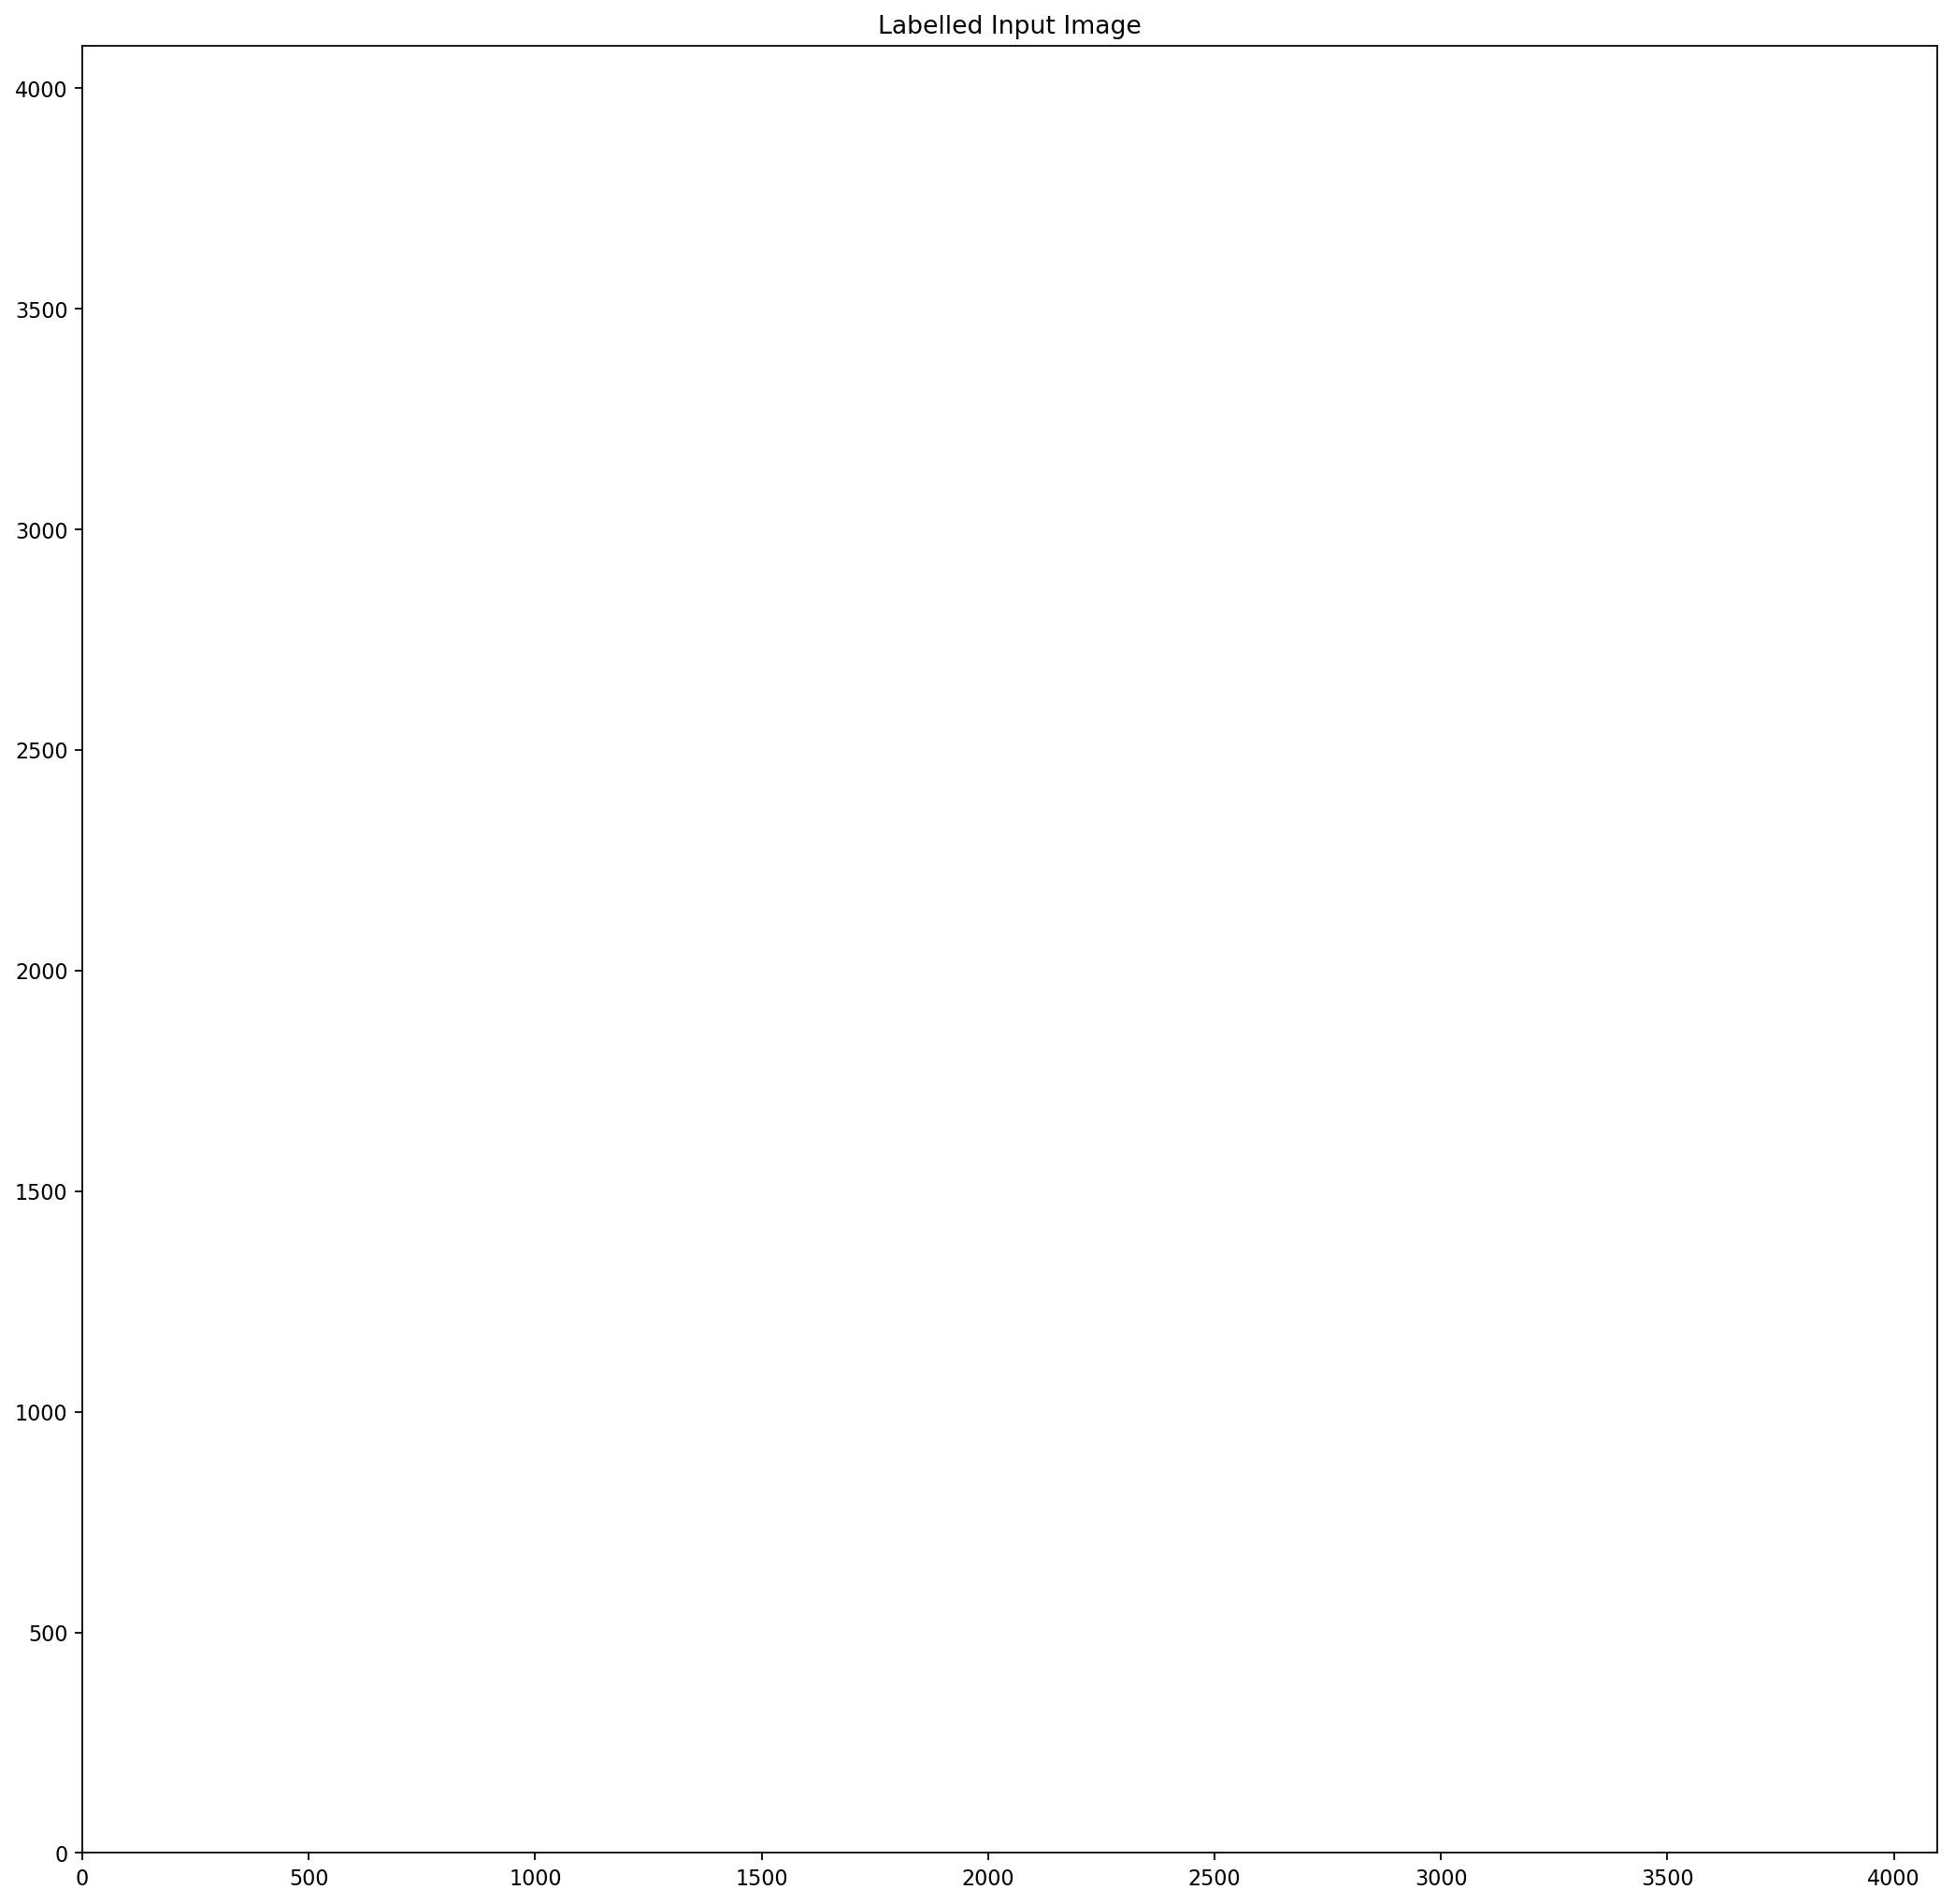

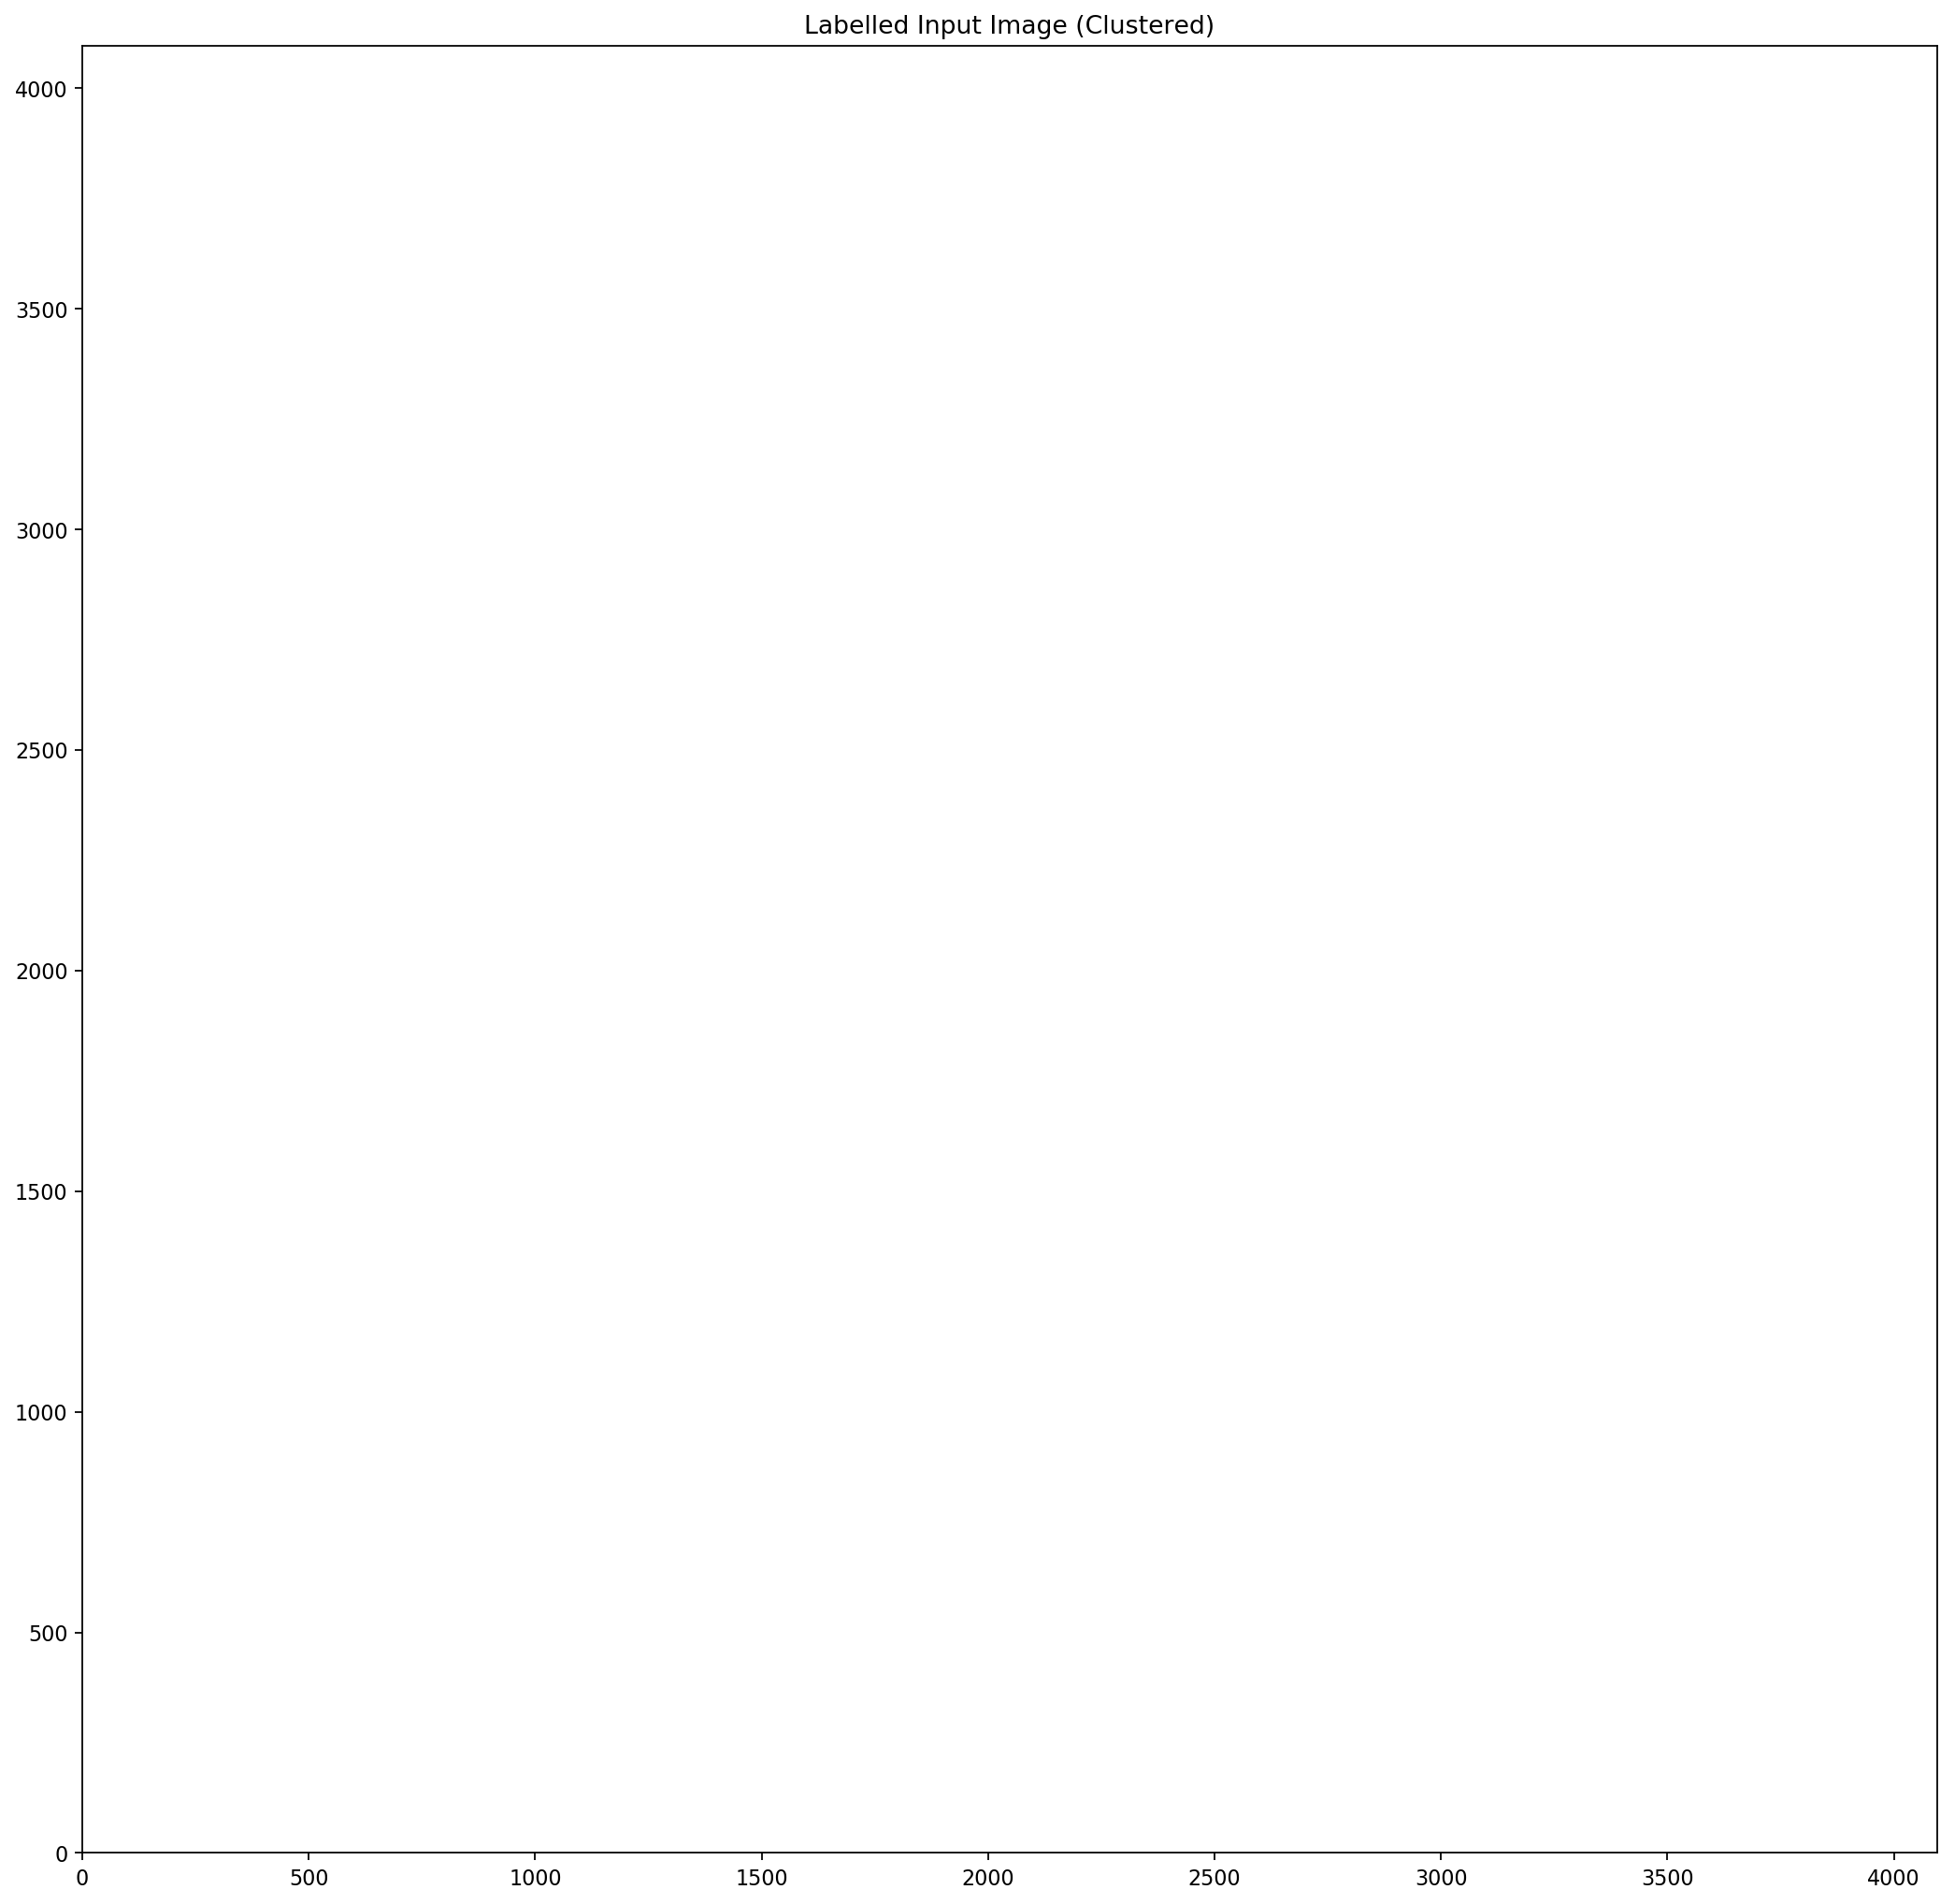

In [15]:
PlotTrack(input_raw_data[DATA_POINT - 1], scale = 4)

PlotApproximatedTrack(input_raw_data[DATA_POINT - 1], title='Labelled Input Image (Clustered)', scale = 4, show_layer=True)